In [2]:
!pip install emoji

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Text processing and NLP
import re
import string
import emoji
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
nltk.download(['punkt', 'wordnet', 'stopwords'])  # Download necessary NLTK data

# Preprocessing for deep learning
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, Flatten, Dropout, LSTM
from tensorflow.keras.activations import softmax

# Model evaluation
from sklearn.model_selection import train_test_split

# Configuration to ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
try:
    # Define the file path
    file_path = 'text.csv'

    # Read the file
    df = pd.read_csv(file_path)

    # Display the first five rows to ensure it's loaded correctly
    print(df.head())

except FileNotFoundError:
    print(f'The file {file_path} was not found. Please make sure the file path is correct.')
except pd.errors.EmptyDataError:
    print(f'The file {file_path} is empty. Please make sure the file contains data.')
except Exception as e:
    print(f'An error occurred while reading the file: {e}')


   Unnamed: 0                                               text  label
0           0      i just feel really helpless and heavy hearted      4
1           1  ive enjoyed being able to slouch about relax a...      0
2           2  i gave up my internship with the dmrg and am f...      4
3           3                         i dont know i feel so lost      0
4           4  i am a kindergarten teacher and i am thoroughl...      4


In [5]:
df.shape

(416809, 3)

In [6]:
# Check if 'Label' column exists in the DataFrame
if 'label' in df.columns:
    # Define a dictionary to map numerical labels to corresponding emotions
    label_map = {
        0: 'Sadness',
        1: 'Joy',
        2: 'Love',
        3: 'Anger',
        4: 'Fear',
        5: 'Surprise'
    }

    # Replace numerical labels with corresponding emotions in the 'Label' column
    df['label'] = df['label'].map(label_map)
    print("Label column successfully updated with emotional descriptors.")
else:
    print("The DataFrame does not contain a 'label' column.")


Label column successfully updated with emotional descriptors.


In [7]:
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,Fear
1,1,ive enjoyed being able to slouch about relax a...,Sadness
2,2,i gave up my internship with the dmrg and am f...,Fear
3,3,i dont know i feel so lost,Sadness
4,4,i am a kindergarten teacher and i am thoroughl...,Fear


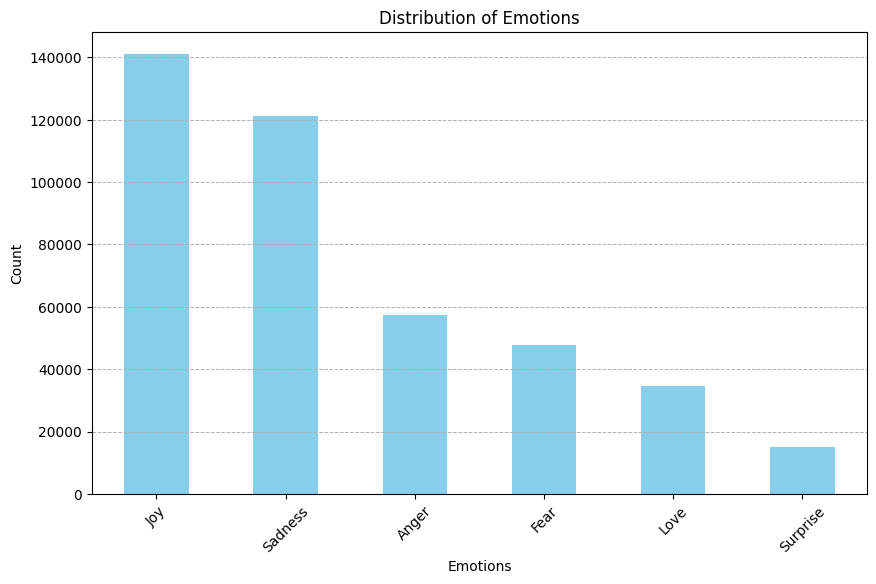

In [8]:
# Ensure 'Label' column exists before proceeding
if 'label' in df.columns:
    # Calculate the count of each label in the 'Label' column
    label_counts = df['label'].value_counts()

    # Plotting the distribution of emotions as a bar chart
    plt.figure(figsize=(10, 6))  # Set the figure size for better readability
    label_counts.plot(kind='bar', color='skyblue')  # Create a bar chart
    plt.title('Distribution of Emotions')  # Title for the bar chart
    plt.xlabel('Emotions')  # Label for the x-axis
    plt.ylabel('Count')  # Label for the y-axis
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', linewidth=0.7)  # Add grid lines for y-axis
    plt.show()  # Display the bar chart
else:
    print("The DataFrame does not contain a 'label' column.")


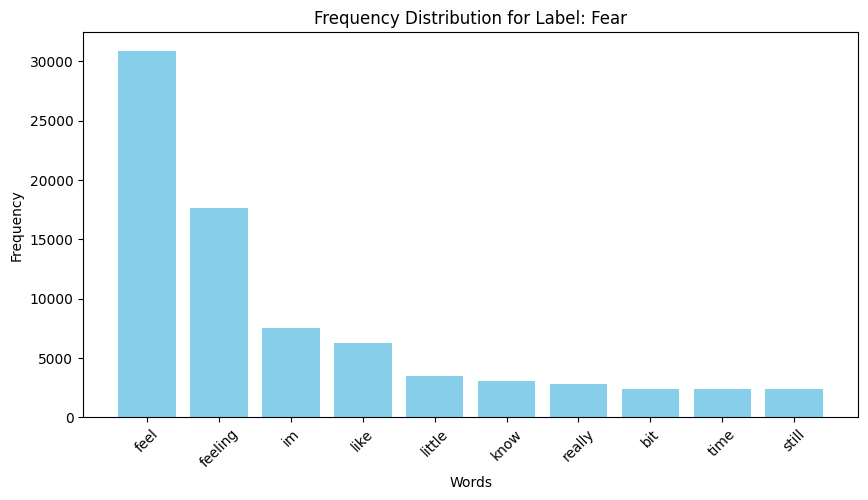

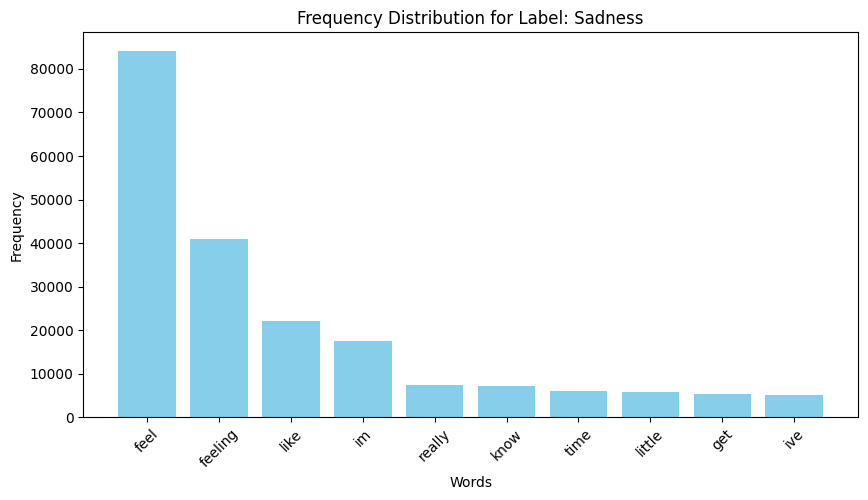

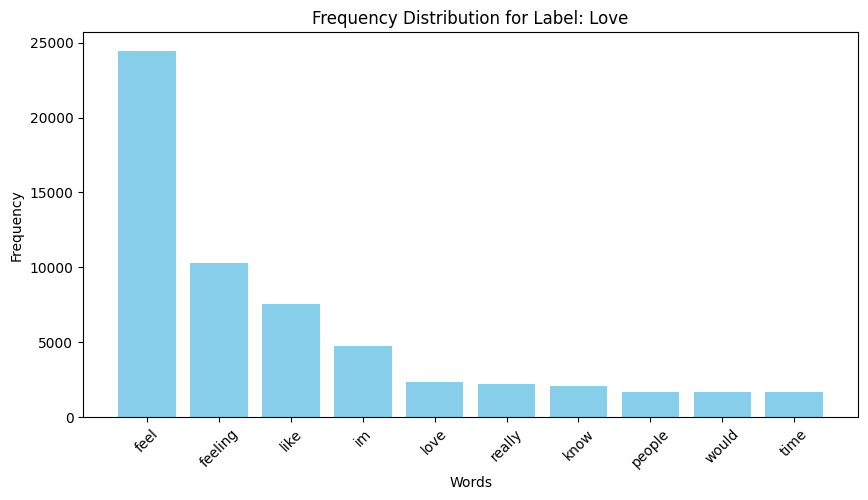

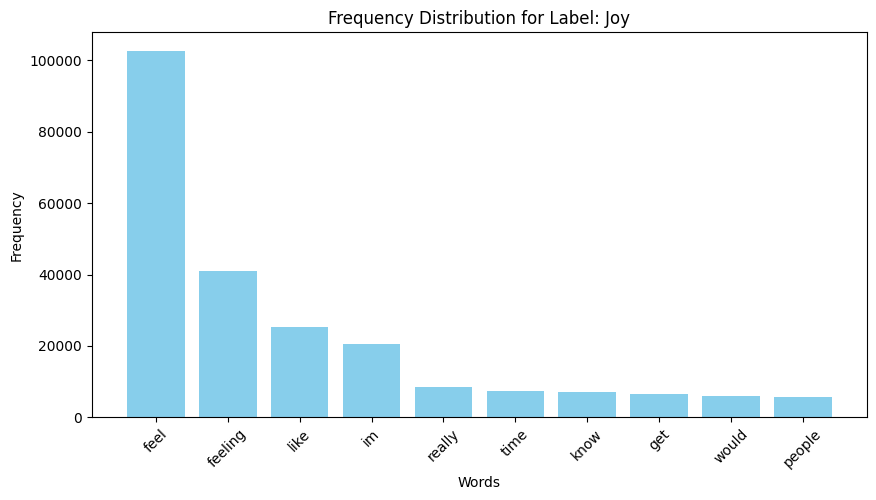

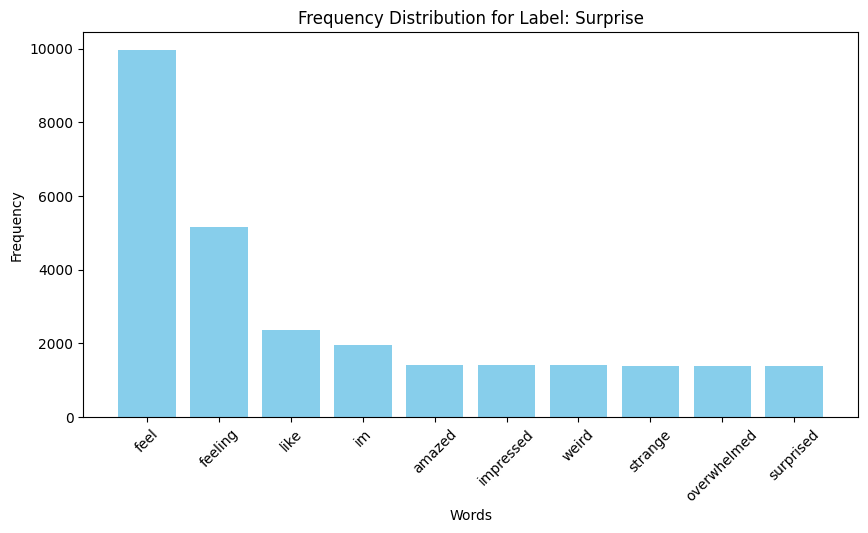

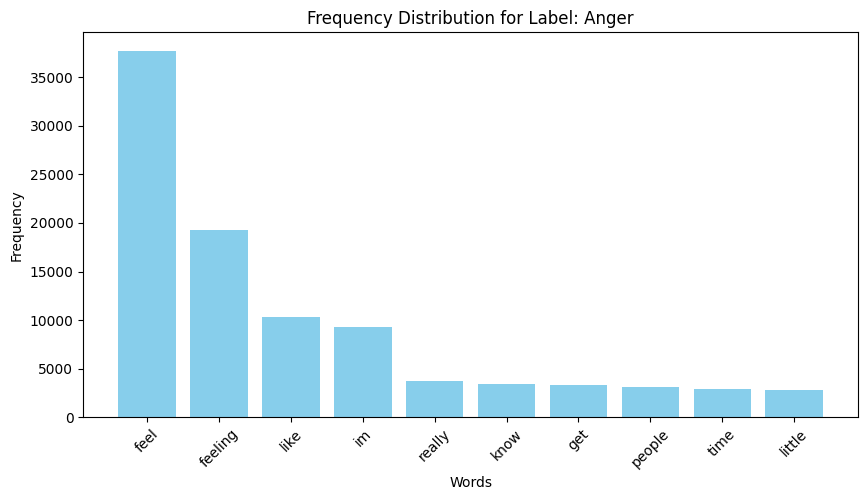

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
# Set up English stop words
stop_words = set(stopwords.words('english'))

# Iterate through each unique label in the DataFrame
for label in df['label'].unique():
    # Filter DataFrame for rows with the current label
    filtered_df = df[df['label'] == label]

    # Concatenate all text for the current label and convert to lowercase
    text = ' '.join(filtered_df['text']).lower()
    # Tokenize text and remove stop words and non-alphabetic tokens
    words = [word for word in word_tokenize(text) if word.isalpha() and word not in stop_words]

    # Generate frequency distribution for the words
    fdist = FreqDist(words)

    # Check if there are words to plot
    if len(fdist) == 0:
        print(f'No data to plot for label: {label}')
        continue  # Skip to the next label if no data

    # Extract the 10 most common words and their frequencies
    most_common_words = fdist.most_common(10)
    words, frequencies = zip(*most_common_words)  # Unpack into two lists

    # Plot frequency distribution for the current label
    plt.figure(figsize=(10, 5))
    plt.bar(words, frequencies, color='skyblue')
    plt.title(f'Frequency Distribution for Label: {label}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

In [10]:
# Define a dictionary to map textual labels back to their original numeric values
label_mapping = {'Sadness': 0, 'Joy': 1, 'Love': 2, 'Anger': 3, 'Fear': 4, 'Surprise': 5}

# Apply reverse mapping to convert textual labels back to numeric values
# Use the 'replace' method which can handle the case where the 'Label' column
# may contain textual labels or NaN values that are not in the mapping dictionary.
# Unmapped values (like NaN) will remain unchanged.
df['label'] = df['label'].replace(label_mapping)


In [11]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [12]:
def remove_html_tags(text):
    return re.sub(r'<[^>]+>', '', text)

def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def handle_chat_words(text):
    new_text = []
    for word in text.split():
        word_upper = word.upper()
        if word_upper in chat_words:
            new_text.append(chat_words[word_upper])
        else:
            new_text.append(word)
    return " ".join(new_text)

def convert_emojis_to_text(text):
    return emoji.demojize(text)

def text_to_lower(text):
    return text.lower()

def remove_extra_whitespace(text):
    return " ".join(text.split())

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)


def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_special_characters(text):
    # This will remove all special characters including the ones that might be used in emojis
    return re.sub(r'[^a-zA-Z\s]', '', text)

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    return " ".join([word for word in tokens if word not in stop_words])

In [13]:
df['Cleaned_Text'] = df['text'].apply(lambda x: remove_html_tags(x))
df['Cleaned_Text'] = df['Cleaned_Text'].apply(lambda x: remove_urls(x))
df['Cleaned_Text'] = df['Cleaned_Text'].apply(lambda x: handle_chat_words(x))
df['Cleaned_Text'] = df['Cleaned_Text'].apply(lambda x: convert_emojis_to_text(x))
df['Cleaned_Text'] = df['Cleaned_Text'].apply(lambda x: text_to_lower(x))
df['Cleaned_Text'] = df['Cleaned_Text'].apply(lambda x: remove_extra_whitespace(x))
df['Cleaned_Text'] = df['Cleaned_Text'].apply(lambda x: remove_punctuation(x))
df['Cleaned_Text'] = df['Cleaned_Text'].apply(lambda x: remove_numbers(x))
df['Cleaned_Text'] = df['Cleaned_Text'].apply(lambda x: remove_special_characters(x))
df['Cleaned_Text'] = df['Cleaned_Text'].apply(lambda x: remove_stopwords(x))
# Verify the result
print(df[['text', 'Cleaned_Text']].head())

                                                text  \
0      i just feel really helpless and heavy hearted   
1  ive enjoyed being able to slouch about relax a...   
2  i gave up my internship with the dmrg and am f...   
3                         i dont know i feel so lost   
4  i am a kindergarten teacher and i am thoroughl...   

                                        Cleaned_Text  
0                 feel really helpless heavy hearted  
1  ive enjoyed able slouch relax unwind frankly n...  
2            gave internship dmrg feeling distraught  
3                                dont know feel lost  
4  kindergarten teacher thoroughly weary job take...  


In [14]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Instantiate the lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def tokenize_text(text):
    return word_tokenize(text)

def lemmatize_text(tokenized_text):
    return [lemmatizer.lemmatize(word) for word in tokenized_text]

def stem_text(tokenized_text):
    return [stemmer.stem(word) for word in tokenized_text]

# Apply the preprocessing steps to the 'Cleaned_Text' column
df['Tokenized_Text'] = df['Cleaned_Text'].apply(lambda x: tokenize_text(x))
df['Lemmatized_Text'] = df['Tokenized_Text'].apply(lambda x: lemmatize_text(x))
df['Stemmed_Text'] = df['Tokenized_Text'].apply(lambda x: stem_text(x))

# If you prefer to have the lemmatized and stemmed text as a single string
df['Lemmatized_Text'] = df['Lemmatized_Text'].apply(lambda x: ' '.join(x))
df['Stemmed_Text'] = df['Stemmed_Text'].apply(lambda x: ' '.join(x))

# Verify the results
print(df[['Cleaned_Text', 'Tokenized_Text', 'Lemmatized_Text', 'Stemmed_Text']].head())


                                        Cleaned_Text  \
0                 feel really helpless heavy hearted   
1  ive enjoyed able slouch relax unwind frankly n...   
2            gave internship dmrg feeling distraught   
3                                dont know feel lost   
4  kindergarten teacher thoroughly weary job take...   

                                      Tokenized_Text  \
0           [feel, really, helpless, heavy, hearted]   
1  [ive, enjoyed, able, slouch, relax, unwind, fr...   
2      [gave, internship, dmrg, feeling, distraught]   
3                           [dont, know, feel, lost]   
4  [kindergarten, teacher, thoroughly, weary, job...   

                                     Lemmatized_Text  \
0                 feel really helpless heavy hearted   
1  ive enjoyed able slouch relax unwind frankly n...   
2            gave internship dmrg feeling distraught   
3                                dont know feel lost   
4  kindergarten teacher thoroughly weary job t

In [16]:
X = df['text']
y = df['label']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)  # Assuming X_train is your training data

# Convert texts to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Calculate maximum sequence length
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

# Perform padding on X_train and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')


Maximum sequence length (maxlen): 178


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, BatchNormalization, Dropout, Dense

model = Sequential()

model.add(Embedding(input_dim=50000, output_dim=100, input_length=maxlen))

model.add(Bidirectional(GRU(128)))

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 178, 100)          5000000   
                                                                 
 bidirectional (Bidirection  (None, 256)               176640    
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [20]:

from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=6)
y_test_one_hot = to_categorical(y_test, num_classes=6)

history = model.fit(
    X_train_padded,
    y_train_one_hot,
    epochs=5,
    batch_size=128,
    validation_data=(X_test_padded, y_test_one_hot)
)


Epoch 1/5
2280/2280 [==============================] - 2550s 1s/step - loss: 0.3117 - accuracy: 0.8766 - val_loss: 0.2013 - val_accuracy: 0.9093
Epoch 2/5
2280/2280 [==============================] - 2548s 1s/step - loss: 0.1183 - accuracy: 0.9336 - val_loss: 0.1288 - val_accuracy: 0.9318
Epoch 3/5
2280/2280 [==============================] - 2549s 1s/step - loss: 0.1007 - accuracy: 0.9394 - val_loss: 0.0941 - val_accuracy: 0.9392
Epoch 4/5
2280/2280 [==============================] - 2558s 1s/step - loss: 0.0956 - accuracy: 0.9403 - val_loss: 0.1077 - val_accuracy: 0.9371
Epoch 5/5
2280/2280 [==============================] - 2536s 1s/step - loss: 0.0915 - accuracy: 0.9418 - val_loss: 0.0945 - val_accuracy: 0.9391


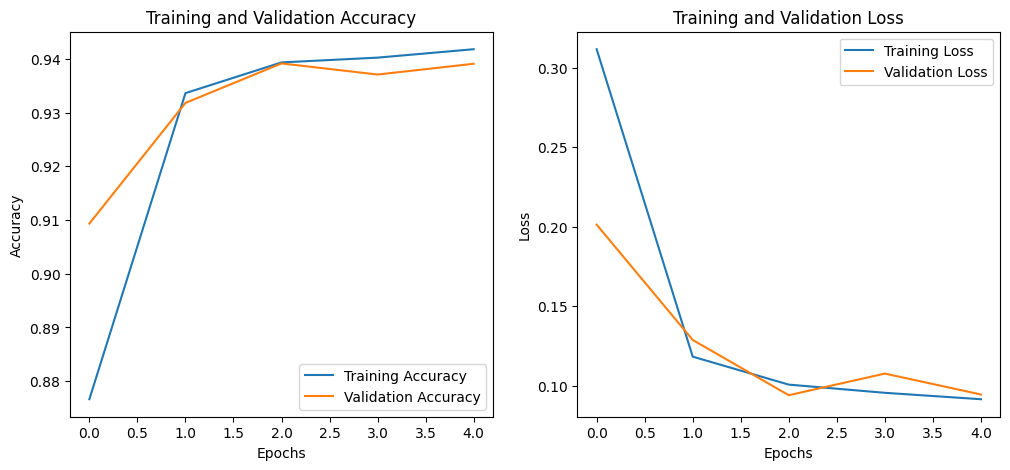

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()